# Problem Statement
Develop a real-time object detection prototype for Tesla's autonomous driving system. The system must accurately identify and locate the following objects on the road using a camera installed on the vehicle,
- Traffic signals: Traffic lights and stop signs.
- Vehicles: Cars, bicycles, trucks, etc.
- Pedestrians: People.
- Animals: Various animal species.

### Constraints
- The object detection algorithm must be computationally efficient to enable real-time inference on commodity hardware (CPU only).
- High accuracy is paramount to ensure the safety of the autonomous driving system.

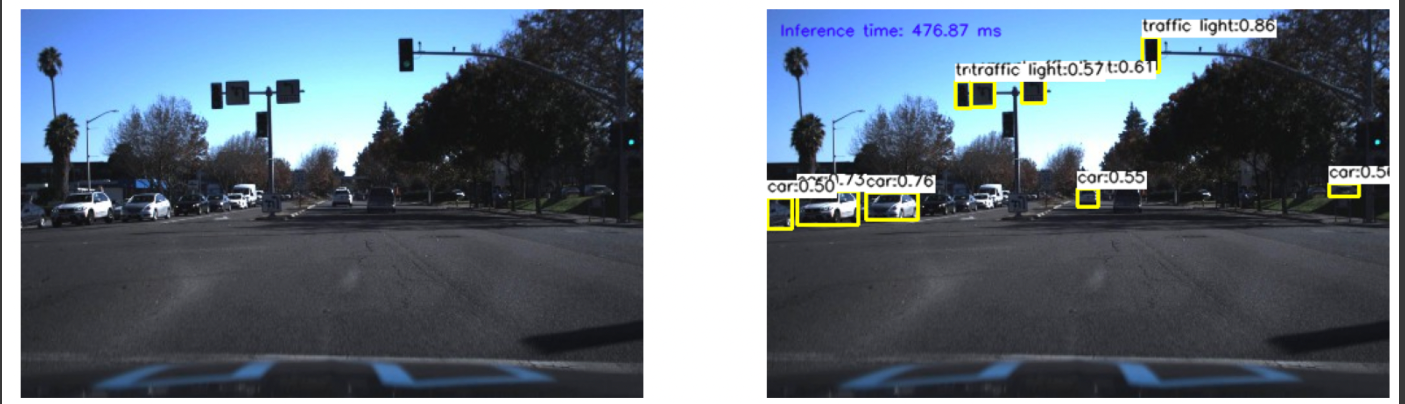

# Problems With Object Detection Using Two Stage Detectors
Although Two Stage Detectors like Faster R-CNN offer high accuracy, they present significant challenges for real-time object detection applications. The following is a breakdown of the key problems,
1. Multi-stage training:
    - Sequential training: Two Stage Detectors typically involve a multi-stage training process.
        - First, the Region Proposal Network (RPN) is trained to generate candidate Bounding Boxes.
        - Then, the object detection network is trained to classify and refine these proposals.
    - Complexity: This sequential training process can be complex and time-consuming, requiring careful coordination and optimization of the training procedures for each stage.
2. Computational overhead:
    - Multiple componenta: Faster R-CNN involves multiple interconnected components: the RPN, ROI Pooling, and the classification or regression network.
    - Computational burden: This intricate architecture can lead to significant computational overhead, especially during inference, hindering real-time performance.
3. Inference speed:
    - Sequestial processing: The two stage nature of these detectors inherently introduces a sequential processing bottleneck.
        - First, region proposals are generated.
        - Then, each proposal is individually processed by the object detection network.
    - Real-time limitation: This sequential processing significantly impacts inference speed, making it challenging to achieve real-time performance, which is crucial for applications like autonomous driving.

### Addressing these limitation
To overcome these challenges and achieve real-time object detection, a new class of algorithms emerged: Single-Stage Object Detectors.
- Single-stage approach: Unlike Two-Stage Detectors, Single-Stage Detectors perform object detection in a single, unified step.
- Direct prediction: They directly predict object classes and bounding box coordinates for a dense set of locations across the image.
- Efficiency: This streamlined approach eliminates the need for a separate region proposal stage, significantly improving inference speed and making them more suitable for real-time applications.

# Single Stage Object Detectors

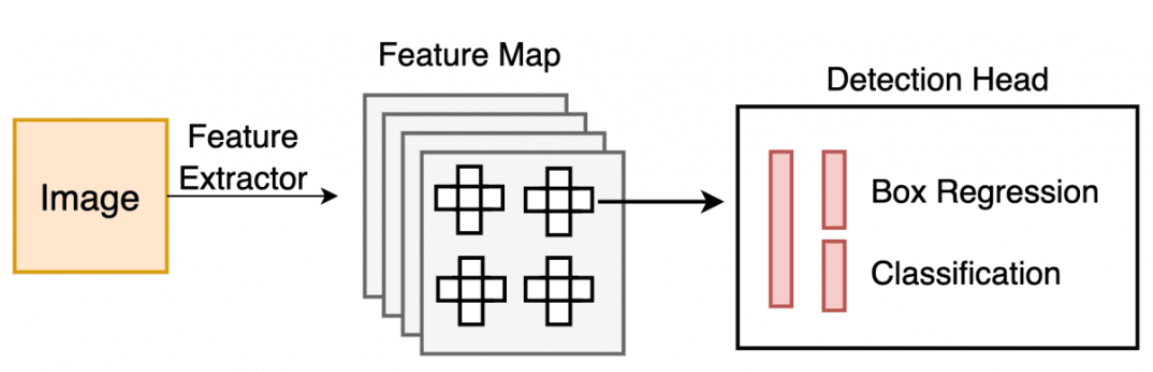

Single Stage Object Detectors offer a streamlined approach to object detection, addressing some of the limitations of Two Stage Detectors like Faster R-CNN. The following is a more detailed explanation,
- Unified process: Unlike Two-Stage Detectors, which involves separate region proposal and object detection stages, single-stage detectors perform both tasks simultaneously within a single, unified network.
- Direct prediction: Instead of generating region proposals first, they directly predict object bounding boxes and their corresponding class probabilities at various locations across the image.
- Efficiency: This direct approach eliminates the need for a separate region proposal stage, resulting in significantly faster inference times.
- Simplicity: Single-Stage Detectors are generally simpler in architecture, often involving fewer components and a more streamlined training process. 

### Key characteristics
- Dense predictions: These models typically generate a dense set of Bounding Box predictions across multiple feature maps extracted from the input image.
- Anchor boxes: Many Single-Stage Detectors utilize anchor boxes, which are predefined boxes with different scales and aspect rations, to guide the prediction process.
- End-to-end training: The entore network, including the prediction of bounding boxes and class probabilities, is trained end-to-end, allowing for efficient optimization of the entire system.

### Popular examples of Single-Stage Detectors
- YOLO (You Only Look Once): A pioneering Single-Stage Detector that divides the input image into a grid and predicts Bounding Boxes and class probabilities directly for each grid cell.
- SSD (Single Shot Detector): Employs a multi-scale feature extraction approach to detect objects at different scales efficiently.
- RetinaNet: Introduces the concept of focal loss to address the class imbalance problem (many more background than foreground detections) in dense object detection.

### Advantages of Single-Stage Detectors
- Speed: Significantly faster inference times compared to Two-Stage Detectors, making them suitable for real-time applications.
- Simplicity: Simpler architecture and training process compared to Two-Stage Detectors.
- Efficiency: More computationally efficient due to the streamlined approach.

### Limitations
- Accuracy: While significantly faster, Single-Stage Detectors may sometimes exhibit slightly lower accuracy compared to Two-Stage Detectors, particularly for complex or densely packed objects.

# Introduction To SSD (Single Shot Detector)

### Core idea
The core principle of SSD lies in its ability to directly predict object locations and classes at multiple scales and locations within a single forward pass of the network. Unlike Two-Stage Detectors, which first generates region proposals and then classifies them, SSD performs both tasks simultaneously.

### Architecture

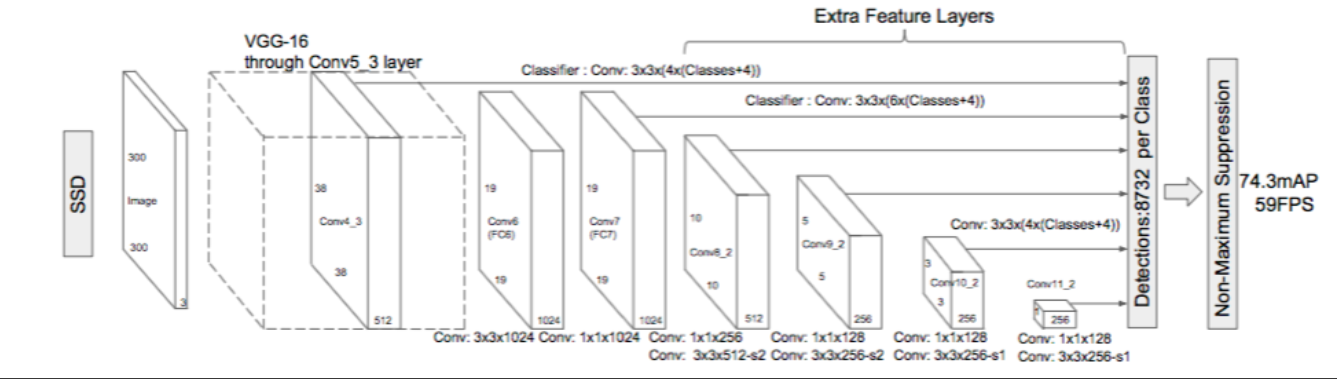

- Base network: SSD typically utilizes a pre-trained Convolutional Neural Network as its backbone, often a modified version of VGG-16.
    - The initial convolutional layers of the base network extract low-level features from the input image.
    - The later layers capture higher-level semantic information.
- Feature map extraction:
    - The base network is modified by removing the Fully Connected (FC) layers.
    - A set of new Convolutional layers is added on top of the base network. These additional layers extract features at differnt scales.
- Multi-scale feature maps:
    - Key concept: SSD leverages feature maps from multiple layers of the network.
        - Earlier layers capture fine-grained details and smaller objects.
        - Later layers capture coarser features and larger objects.
- Default boxes (anchor boxes):
    - At each location on each feature map, a set of default boxes (anchor boxes) with different aspect rations and scales is defined.
    - These anchor boxes serve as initial guesses for potential object locations.
- Prediction layers:
    - Each feature map is connected to a set of Convolutional prediction layers.
    - These layers predict:
        - Class scores: The probability of each object class (e.g., car, person, background) for each anchor box.
        - Bounding Box offsets: Adjustments to the default box coordinates to better match the actual object boundaries.

# How SSD Detects Objects At Different Scales, Shapes And Locations In A Single Forward Pass?

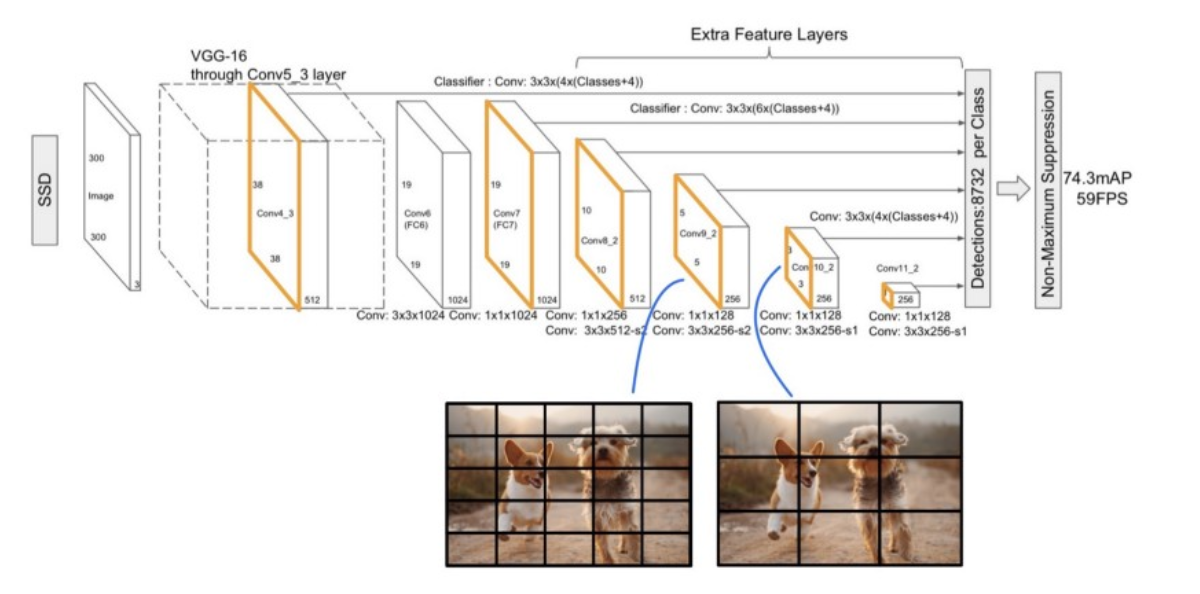

1. Multi-scale feature maps:
    - Key concept: SSD leverages feature maps from multiple layers of the network.
        - Earlier layers capture fine-grained details and are better suited for detecting smaller objects.
        - Later layers capture coarser features and are more effective at detecting larger objects.
    - Example: Imagine the network has 5 convolutional layers.
        - The feature map from the first layer might be highly detailed, capturing fine textures and edges.
        - The feature map from the fifth layer, on the other hand, might represent larger regions of the image, better suited for detecting large objects like cars or buildings.
2. Grid detectors:
    - Discretization: Each feature map can be thought of as a grid.
    - Grid cells: This grid divides the feature map into a set of cells.
    - Predictions per cell: At each grid cell, the SSD network predicts a set of Bounding Box offsets and class probabilities for a predefined set of default boxes (anchor boxes).
3. Default boxes (anchor boxes):
    - Predefined boxes: Default boxes are pre-defined boxes with different shapes (aspect ratios) and sizes anchored at each grid cell.
    - Scale variation: The size and aspect ratio of these boxes vary across different feature maps.
        - For example, smaller default boxes are used on earlier layers (higher resolution) to detect smaller objects.
        - Larger default boxes are used on later layers (lower resolution) to detect larger objects.
4. Predictions:
    - Class scores: For each default box, the network predicts the probability of an object belonging to each class (e.g., car, person, background).
    - Bounding Box offsets: The network also predicts offsets ($\Delta{x}$, $\Delta{y}$, $\Delta{w}$, $\Delta{h}$) to adjust the default box coordinates to better match the actual object boundaries.

# MultiBox And Its Influence On SSD

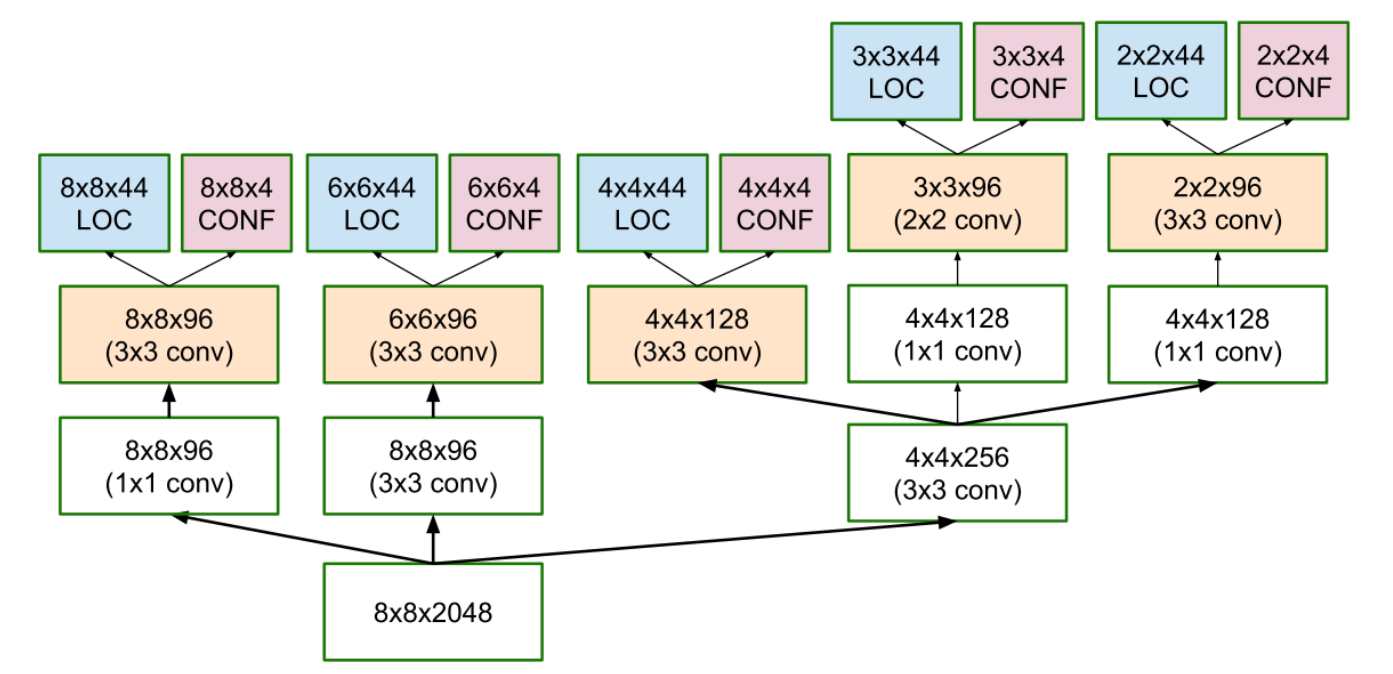

### MultiBox - A foundation for SSD
- Class-agnostic Bounding Box proposals: MultiBox was an early approach to generating object Bounding Box proposals. Unlike traditional methods that relied on image segmentation or hand-crafted features, MultiBox utilizes a CNN to directly predict Bounding Box coordinates.
- Inception-style architecture: The original MultiBox implementation employed an Inception-style architecture, known for its efficient use of multiple Convolutional filters at different scales.
    - `1x1` convolutions play a crucial role in dimensionality reduction within the Inception modules.
- Loss function:
    - Confidence loss: Measures how confident the network is about the presence of an object within a predicted Bounding Box.
        - Typically, categorical cross-entropy is used to measure the discrepancy between the predicted confidence score and the ground truth (whether an object is present or not).
    - Location loss: Measures the distance between the predicted Bounding Box coordinates (x, y, width, height) and the ground truth Bounding Box coordinates.
        - L2-norm (Euclidean distance) is commonly used to measure this distance.
    - Combined loss: The overall loss function is a weighted sum of the confidence loss and the location loss.

### Default boxes and SSD
- Inspiration: The concept of default boxes (or anchor boxes) in SSD draws heavilty from the MultiBox approach.
- Predefined boxes: Default boxes are pre-defined boxes with different shapes (aspect ratios) and sizes anchored at each grid cell of the feature map.
- Flexibility: This set of default boxes allows the network to consider objects of various sizes and shapes at different locations within the image.
- Number of default boxes: In the original SSD paper, six default boxes with different aspect ratios were used per grid cell on each feature map.

### Key takeaways
- MultiBox pioneered the use of convolutional neural networks for generating object Bounding Box proposals.
- Its key concepts, such as the use of default boxes and the combination of confidence and location losses, have significantly influenced the development of subsequent object detection methods, including SSD.
- SSD builds upon the foundation laid by MultiBox, extending it with a multi-scale feature extraction approach and a more sophisticated prediction mechanism.

# Producing Detections

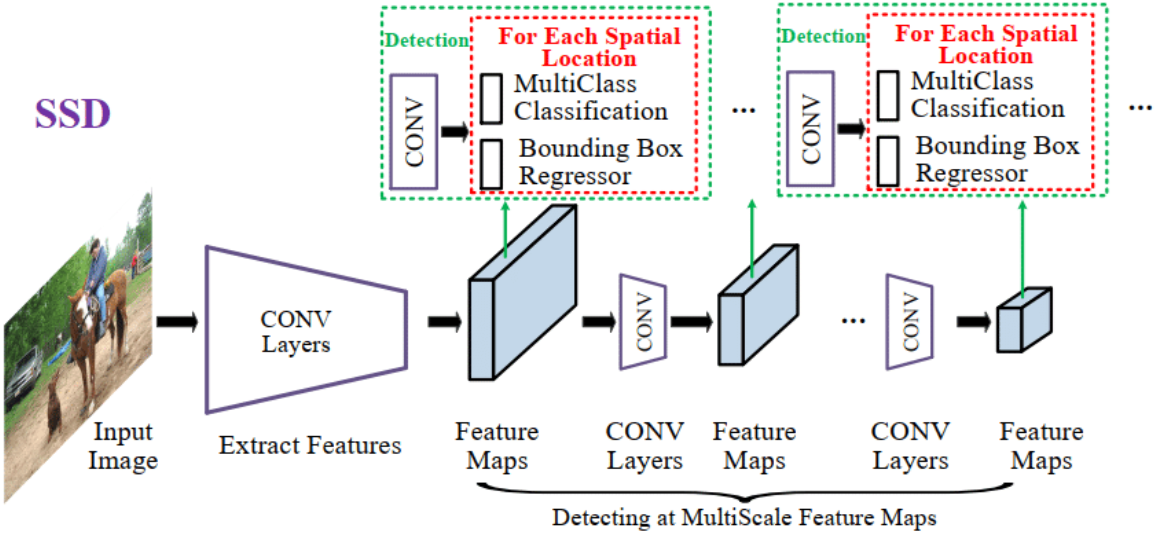

The following is how SSD produces detections at different shapes, scales, and locations,
1. Multi-scale feature maps:
    - Fature map hierarchy: SSD utilizes feature maps from multiple layers of the convolutional network. These feature maps represent the image at different levels of abstraction and spatial resolution.
        - Early layers: Capture fine-grained details and are suitable for detecting smaller objects.
        - Later layers: Capture coarser features and are better suited for detecting larger objects.
2. Detection modules:
    - Connected to each feature map: Each feature map is connected to a dedicated detection module.
    - Detection module structure: Each detection module typically consists of,
        - Convolutional layers: A small number of convolutional layers that further process the feature map.
        - Prediction layers:
            - Class prediction: A Convolutional layer that predicts the probability of each object class (e.g., car, person, background) for each default box.
            - Bounding box regression: A Convolutional layer that predicts the offsets ($\Delta{x}$, $\Delta{y}$, $\Delta{w}$, $\Delta{h}$) to adjust the default box coordinates and better match the actual object boundaries.
3. Detections at different scales and locations:
    - Multi-scale predictions: By connecting detection modules to feature maps at different scales, SSD can effectively detect objects of various sizes.
    - Grid-based predictions: On each feature map, the detection module operates on a grid of cells.
        - At each grid cell, a set of default boxes with different aspect ratios is considered.
        - The network predicts the objectness score and bounding box offsets for each default box within each grid cell.
    - Location information: The grid structure on each feature map implicitly encodes location information.
        - Grid cells in earlier layers correspond to smaller regions in the original image, while grid cells in later layers correspond to larger regions.
4. Combining predictions:
    - Detections from multiple layers: The SSD network generates a set of detections from each feature map.
    - Non-Maximum Suppression (NMS): After all detections are generated, NMS is applied to filter out redundant detections and select the most confident predictions for each object.

# Code Implementation Of SSD

Link: https://github.com/balancap/SSD-Tensorflow

# Introduction To YOLO

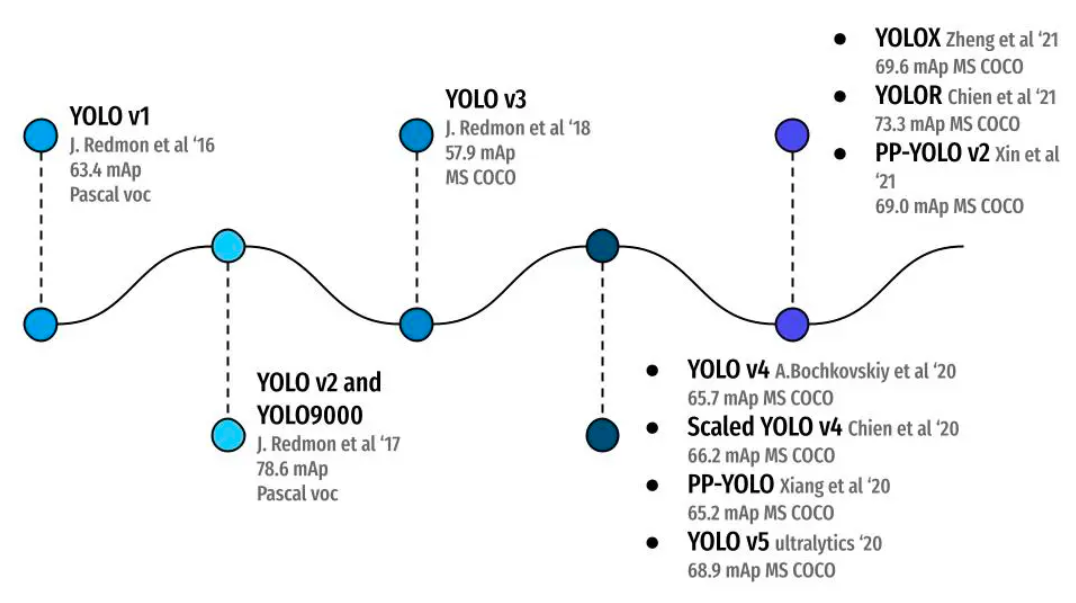

### YOLO (You Only Look Once)
- Core concept: YOLO revolutionized object detection by performing detection in a single forward pass of a CNN.
    - Instead of generating region proposals and then classifying them, YOLO directly predicts Bounding Boxes and class probabilities for the entire image in a single step.
- Speed: This unified approach significantly improves inference speed, making YOLO one of the fastest object detection algorithms available.
- Grid-based prediction: The input image is divided into a grid. Each grid cell is responsible for predicting a fixed number of bounding boxes and their corresponding class probabilities.
- Early versions: Early versions of YOLO, while fast, suffered from limitations in accurately detecting small objects and handling objects that spanned multiple grid cells.

### YOLOv2 (YOLO9000)
YOLOv2 introduced several key improvements,
- Batch normalization: Improved training stability and reduced overfitting.
- Anchor boxes: Incorporated anchor boxes, similar to SSD, to better handle objects of different shapes and sizes.
- Dimension clusters: Used k-means clustering to determine the optimal set of anchor box dimensions for the dataset.
- Multi-scale training: Trained the network on images of different sizes during training to improve performance on objects of various scales.
- Objectness score: Introduced an objectness score to predict the likelihood of an object being present within a grid cell.

### YOLOv3
YOLOv3 introduced several significant further enhancements,
- Multi-scale predictions: Utilized feature maps from different layers of the network to predict objects at multiple scales.
- Bounding box refinement: Improved the bounding box prediction mechanism.
- New backbone: Employed a new backbone network (Darknet-53) that was more efficient and accurate than previous versions.
- Improved accuracy: YOLOv3 achieved state-of-the-art performance on the COCO dataset, demonstrating a significant improvement in accuracy while maintaining high speed.

### Later versions (YOLOv4, YOLOv5, etc.)
Subsequent versions of YOLO, such as YOLOv4 and YOLOv5, have continued to push the boundaries of object detection performance.
- They incorporate advanced techniques like data augmentation, improved backbones, and more sophisticated loss functions.
- YOLOv5, despite being developed independently, has gained significant popularity due to its ease of use and strong performance.

# Architecture Of Simple YOLO

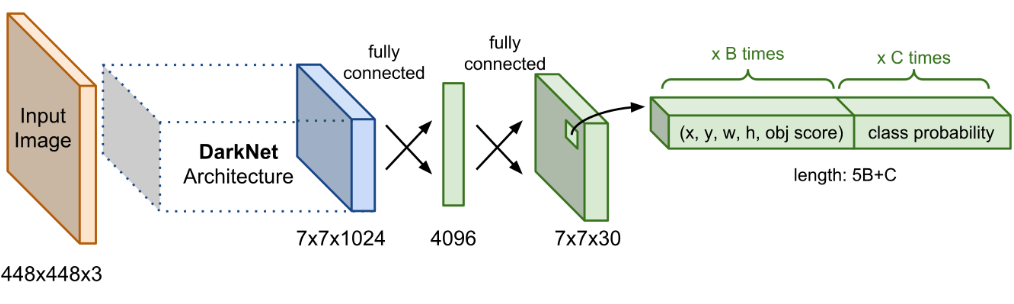

Simple YOLO, or You Only Look Once, is a revolutionary real-time object detection algorithm that has significantly impacted the field of Computer Vision. Its unique approach of processing the entire image in a single pass to predict boxes and class probailities for objects has made it a popular choice for various applications.

### Key concepts and architecture
1. Single-stage detection: Unlike traditional Two Stage Detectors like R-CNN, which generate region proposals and then classify them, YOLO performs both tasks simultaneously in a single forward pass through the network. This significantly improves detection speed.
2. Grid-based approach: The input image is divided into a grid of cells. Each cell is responsible for predicting a set of bounding boxes and their associated confidence scores. The confidence score reflects the probability of an object being present in that cell and the accuracy of the predicted bounding box.
3. Bounding box prediction: Each cell predicts multiple bounding boxes, each defined by five parameters:
    - x, y: Coordinates of the center of the bounding box relative to the cell.
    - w, h: Width and height of the bounding box relative to the entire image.
    - Confidence: A score indicating the probability of an object being present in the bounding box and the accuracy of the prediction.
4. Class probability prediction: For each cell, the model also predicts the conditional class probabilities, which represent the likelihood of an object belonging to a specific class given that an object is present in the cell.
5. Non-Maximum Suppression (NMS): After the initial predictions, non-maximum suppression is applied to filter out redundant bounding boxes. This algorithm selects the bounding box with the highest confidence score for each object and discards overlapping boxes with lower confidence scores.

### Architecture overview
The Simple YOLO architecture typically consists of the following components:
1. Convolutional Neural Network (CNN): A deep CNN is used to extract features from the input image. This CNN is responsible for learning complex patterns and representations of objects in the image.
2. Fully Connected (FC) layers: The output of the CNN is fed into fully connected layers, which are responsible for predicting the bounding box coordinates, confidence scores, and class probabilities for each cell in the grid.

### How Simple YOLO works?
1. Image input: The input image is resized to a fixed size (e.g., 448x448 pixels) and fed into the CNN.
2. Feature extraction: The convolutional layers extract features from the image.
3. Bounding box and class predictions: The fully connected layers predict bounding boxes, confidence scores, and class probabilities for each grid cell.
4. Non-Maximum Suppression: NMS is applied to refine the predictions and remove redundant detections.
5. Output: The final output is a set of bounding boxes with their associated class labels and confidence scores.

### Advantages of Simple YOLO
- Real-time performance: YOLO's single-stage approach makes it significantly faster than two-stage detectors, enabling real-time object detection in various applications.
- High accuracy: Despite its speed, YOLO achieves competitive accuracy compared to other object detection methods.
- Simplicity: The architecture is relatively straightforward, making it easier to implement and understand.

### Limitations of Simple YOLO
- Localization errors: YOLO can sometimes struggle with localizing small objects accurately.
- Difficulty in detecting multiple objects in a cell: If multiple objects are present in a single cell, YOLO may have difficulty detecting all of them.

# Architecture Of YOLOv2
YOLOv2, or You Only Look Once v2, is a significant improvement upon its predecessor, YOLO. It builds upon the core concept of single-stage object detection, refining it to achieve higher accuracy and speed.

### Key architectral enhancements
1. Batch normalization:
    - YOLOv2 incorporates batch normalization across all convolutional layers.
    - This stabilizes training, improves convergence, and acts as a form of regularization, reducing the need for dropout.
2. High-resolution classifier:
    - YOLOv1 trained its classifier network on 224x224 images and then increased the resolution to 448x448 for detection. This abrupt change hindered performance.
    - YOLOv2 first fine-tunes the classifier network on ImageNet at 448x448 resolution for 10 epochs before training for detection. This allows the network to adjust to the higher resolution, leading to a 4% increase in mAP.
3. Convolutional with anchor boxes:
    - YOLOv1 predicted bounding box coordinates directly from the convolutional features.
    - YOLOv2 introduces anchor boxes, inspired by Faster R-CNN.
    - The network now predicts offsets relative to these anchor boxes, improving localization accuracy.
    - This change also simplifies the prediction problem, making it easier for the network to learn.
4. Dimension clusters for anchor box predictions:
    - Instead of manually selecting anchor box dimensions, YOLOv2 uses k-means clustering on the training set bounding boxes to determine the optimal anchor box dimensions.
    - This results in anchor boxes that better match the objects in the dataset, further improving accuracy.
5. Fine-grained features:
    - YOLOv2 adds a passthrough layer that concatenates low-resolution features from earlier layers with higher-resolution features.
    - This allows the network to access fine-grained details, improving the detection of small objects.
6. Multi-scale training:
    - During training, YOLOv2 randomly adjusts the input image size within certain constraints.
    - This forces the network to adapt to different input resolutions, making it more robust and improving performance on objects of various sizes.

# How YOLOv2 works?
1. Image input: The input image is resized and fed into the network.
2. Feature extraction: The network extracts features from the image using a series of convolutional layers.
3. Bounding box prediction: The network predicts bounding box offsets relative to anchor boxes, along with objectness scores and class probabilities.
4. Non-Maximum Suppression: Non-maximum suppression is applied to filter out redundant detections and select the most confident predictions.
5. Output: The final output is a set of bounding boxes with associated class labels and confidence scores.

### Key advantages of YOLOv2
- Real-time performance: YOLOv2 maintains the real-time performance of its predecessor while achieving significant accuracy improvements.
- Improved accuracy: The architectural enhancements, such as anchor boxes and fine-grained features, lead to higher accuracy in object detection.
- Robustness: Multi-scale training improves the network's ability to detect objects of various sizes and aspect ratios.

# Architecture Of YOLOv3

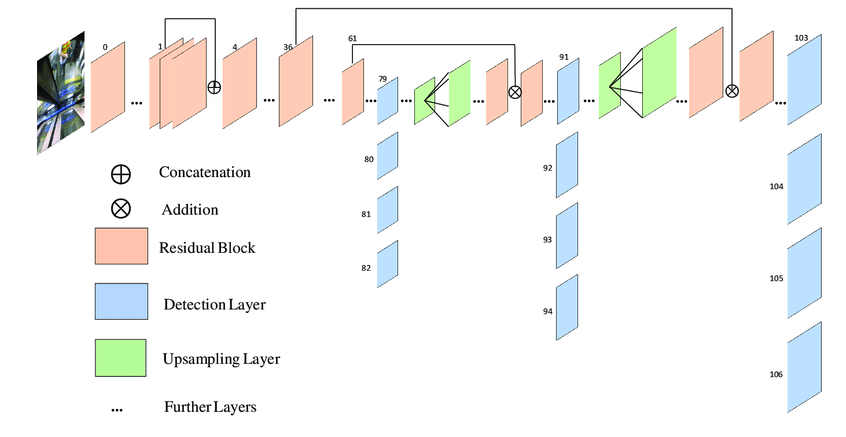

YOLOv3 (You Only Look Once, version 3) is a state-of-the-art object detection algorithm that has revolutionized the field of Computer Vision. It's renowned for its ability to detect objects in real-time with high accuracy, making it a popular choice for various applications like self-driving cars, surveillance systems, and robotics.

### Key architectural components
1. Darknet-53 backbone:
    - YOLOv3 utilizes Darknet-53, a deep convolutional neural network (CNN), as its backbone for feature extraction.
    - Darknet-53 is a 53-layer convolutional network that is both faster and more accurate than its predecessor, Darknet-19, used in YOLOv2.
    - It's designed to be computationally efficient, allowing for real-time processing.

    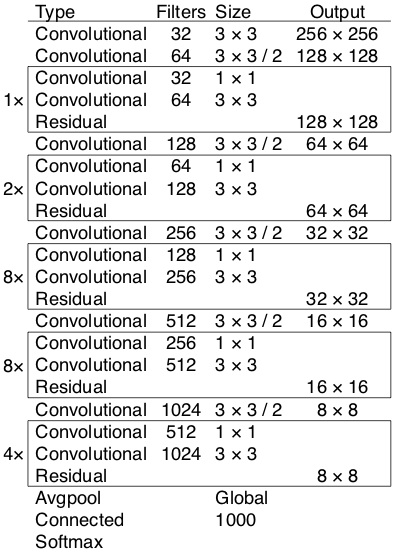

2. Feature Pyramid Network (FPN):
    - YOLOv3 incorporates FPN to detect objects at multiple scales effectively.
    - FPN combines feature maps from different layers of the network, creating a pyramid-like structure.
    - This allows the model to capture both fine-grained details (from earlier layers) and broader contextual information (from deeper layers).
3. Three detection layers:
    - YOLOv3 predicts bounding boxes and class probabilities at three different scales:
        - Large objects: Detected at the deepest layer of the network.
        - Medium objects: Detected at an intermediate layer.
        - Small objects: Detected at a shallower layer.
    - This multi-scale approach significantly improves the detection of objects of varying sizes.
4. Anchor boxes:
    - Each grid cell in the feature maps predicts a set of bounding boxes with different aspect ratios.
    - These pre-defined boxes, known as anchor boxes, help the model to better match the shapes of objects in the image.
5. Bounding box prediction:
    - Each bounding box prediction consists of five parameters:
        - (x, y): Coordinates of the center of the bounding box.
        - (w, h): Width and height of the bounding box.
        - Confidence score: Indicates the probability of an object being present in the bounding box and the accuracy of the prediction.
6. Class probability prediction:
    - For each bounding box, the model predicts the probability of the object belonging to each class.
7. Non-Maximum Suppression (NMS):
    - After the initial predictions, NMS is applied to filter out redundant bounding boxes.
    - It selects the bounding box with the highest confidence score for each object and discards overlapping boxes with lower confidence scores.

### How YOLOv3 works?
1. Image input: The input image is fed into the Darknet-53 backbone.
2. Feature extraction: The backbone extracts features from the image at different scales.
3. Feature pyramid construction: FPN combines these features to create a pyramid of feature maps.
4. Bounding box and class predictions: At each scale, the model predicts bounding boxes and class probabilities for each grid cell.
5. Non-Maximum Suppression: NMS is applied to refine the predictions and remove redundant detections.
6. Output: The final output is a set of bounding boxes with their associated class labels and confidence scores.

### Key advantages of YOLOv3
- Real-time performance: YOLOv3 is known for its speed, making it suitable for real-time applications.
- High accuracy: It achieves high accuracy in object detection, comparable to two-stage detectors.
- Multi-scale object detection: The FPN architecture allows YOLOv3 to effectively detect objects of various sizes.

# Architecture Of YoLOv4
YOLOv4 stands for You Only Look Once version 4. It's a real-time object detection model designed to bridge the gap between accuracy and speed. Unlike other convolutional neural network (CNN) based object detectors, YOLOv4 is not only applicable for recommendation systems but also for standalone process management and human input reduction. Its operation on conventional graphics processing units (GPUs) allows for mass usage at an affordable price.

### Key architectural components
1. Backbone:
    - CSPDarknet53: YOLOv4 employs CSPDarknet53 as its backbone for feature extraction. CSP (Cross-Stage Partial) connections enhance information flow and gradient flow within the network, leading to faster training and improved performance.
2. Neck:
    - Spatial Pyramid Pooling (SPP) and Path Aggregation Network (PAN): The neck of YOLOv4 combines SPP and PANet.
    - SPP extracts features at various scales, improving detection of objects of different sizes.
    - PANet efficiently aggregates feature maps from different levels of the backbone, allowing the model to capture both fine-grained details and broader contextual information.
3. Head:
    - YOLOv3 Head: YOLOv4 utilizes the YOLOv3 head for detection, predicting bounding boxes, objectness scores, and class probabilities at three different scales.

### Key innovations and techniques
- Bag of freebies: These are techniques that improve accuracy during training without increasing inference cost. Examples include:
    - Data augmentation: Mosaic augmentation, MixUp augmentation, Flip augmentation.
    - Regularization: DropBlock regularization.
    - Activation function: Mish activation.
- Bag of specials: These are plug-and-play modules that increase accuracy with a slight increase in inference cost. Examples include:
    - Weighted Residual Connections (WRC): Enhance information flow within the network.
    - Cross-Stage Partial connections (CSP): Improve training speed and model efficiency.
    - Self-Adversarial Training (SAT): Enhances robustness to adversarial attacks.
    - Mish activation: Improves model performance compared to ReLU.
    
### How YOLOv4 works?
1. Image input: The input image is fed into the CSPDarknet53 backbone.
2. Feature extraction: The backbone extracts features from the image at different scales.
3. Feature aggregation: The SPP and PANet refine and aggregate the extracted features.
4. Bounding box and class predictions: The YOLOv3 head predicts bounding boxes, objectness scores, and class probabilities at three different scales.
5. Non-Maximum Suppression (NMS): NMS is applied to filter out redundant detections.
6. Output: The final output is a set of bounding boxes with their associated class labels and confidence scores.

### Key advantages of YOLOv4
- Real-time performance: YOLOv4 is known for its speed, making it suitable for real-time applications.
- High accuracy: It achieves state-of-the-art results in object detection, surpassing previous YOLO versions and many other detectors.
- Efficiency: YOLOv4 can be trained and deployed on a single GPU, making it accessible to a wider range of users.

# Architecture Of YOLOv5
YOLOv5 is a state-of-the-art object detection algorithm, known for its speed, accuracy, and ease of use. Developed by Ultralytics, it builds upon the success of previous YOLO versions while introducing several key innovations.

### Key architectural components
1. Backbone:
    - CSPDarknet53: YOLOv5 utilizes a modified version of the Darknet53 architecture called CSPDarknet53 as its backbone.
    - CSP (Cross-Stage Partial) connections improve information flow and gradient flow within the network, leading to faster training and better performance.
2. Neck:
    - Path Aggregation Network (PAN): The neck of YOLOv5 employs a PANet structure.
    - PANet efficiently aggregates feature maps from different stages of the backbone, allowing the model to capture both fine-grained details and broader contextual information.
3. Head:
    - YOLO head: The head of YOLOv5 is responsible for generating the final output, which includes bounding box predictions, objectness scores, and class probabilities.
    - It uses anchor boxes to predict object locations and sizes.

### Key features and enhancements
- Data augmentation: YOLOv5 incorporates a wide range of data augmentation techniques, including:
    - Mosaic augmentation: Combines four images into a single image, improving robustness to scale variations and occlusion.
    - MixUp augmentation: Blends two images and their corresponding labels, increasing generalization.
    - Horizontal Flip: Flips images horizontally, increasing the dataset size and improving model robustness.
- Loss function: YOLOv5 utilizes the CIoU (Complete Intersection over Union) loss function, which effectively measures the distance between predicted and ground-truth bounding boxes.
- Efficient training: YOLOv5 incorporates various training optimizations, including:
    - Mixed precision training: Uses both 16-bit and 32-bit floating-point numbers during training, accelerating the process.
    - AutoAnchor: Automatically adjusts anchor box dimensions to better match the objects in the dataset.
- Model variants: YOLOv5 offers several model variants (YOLOv5n, YOLOv5s, YOLOv5m, YOLOv5l, YOLOv5x) with varying sizes and computational costs, allowing users to choose the best model for their specific needs.

### How YOLOv5 works?
1. Image input: The input image is fed into the CSPDarknet53 backbone.
2. Feature extraction: The backbone extracts features from the image at different scales.
3. Feature aggregation: The PANet aggregates these features to create a richer feature representation.
4. Bounding box and class predictions: The head predicts bounding boxes, objectness scores, and class probabilities for each anchor box.
5. Non-Maximum Suppression (NMS): NMS is applied to filter out redundant detections.
Output: The final output is a set of bounding boxes with their associated class labels and confidence scores.

### Key advantages of YOLOv5
- Real-time performance: YOLOv5 is known for its speed, making it suitable for real-time applications.
- High accuracy: It achieves high accuracy in object detection, comparable to other state-of-the-art methods.
- Ease of use: YOLOv5 is easy to train and deploy, thanks to its user-friendly interface and pre-trained models.
- Flexibility: The availability of different model variants allows users to choose the best model for their specific hardware and performance requirements.

# Core Concept Of YOLO Object Detection
1. Image division:
    - The image is indeed divided into a grid of cells.
    - Each cell is responsible for predicting objects whose center falls within that cell.
2. Output vector:
    - The output vector has the structure: `S * S * (C + 5)`.
        - `S * S`: Represents the number of grid cells.
        - `C`: Represents the number of object classes.
        - `5`: Represents the following information for each predicted object,
            - (x, y): Coordinates of the object's center (relative to the cell's top-left corner).
            - w, h: Width and height of the bounding box (normalized to the image size).
            - Confidence (P.Object): A score indicating the probability that an object exists in the cell.
3. CNN:
    - YOLO utilizes a deep CNN to directly predict the output vector for the entire image in a single forward pass. This makes it very fast.
    - The loss function typically used is a combination of,
        - Localization loss: Measures the error in predicting the bounding box coordinates (x, y, w, h).
        - Classification loss: Measures the error in predicting the object class probabilities.
        - Confidence loss: Measures the error in predicting the confidence score (P.Object).
4. Object assignment:
    - A crucial aspect of YOLO is how it assigns objects to grid cells.
    - Only the cell containing the object's center is responsible for predicting that object.
    - This simplifies the problem and allows for efficient object detection.

### Key points
- Speed" YOLO's single stage approach makes it significantly faster than Two Stage Object Detectors (like R-CNN) that involves separate region proposal and object classification steps.
- Simplicity: The direct prediction of bounding boxes and class probabilities leads to a simpler architecture compared to two-stage methods.
- Limitations:
    - YOLO can struggle with small objects, especially when multiple small objects appear close together.
    - It can have diffiulty accurately localizing objcts, particularly when objects have unusual shapes or aspect ratios.

# Difference Between SSD And YOLO

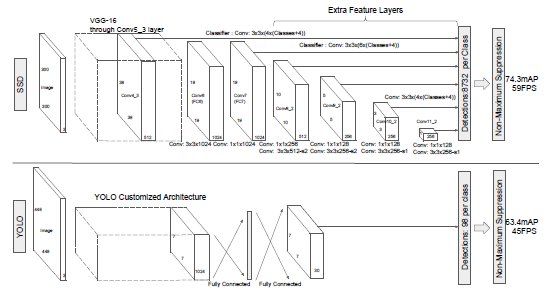

SSD and YOLO are both popular single-stage object detection algorithms, but they have some key differences,

1. Speed:
    - SSD: Offers a good balance between speed and accuracy, often faster than two-stage detectors but slightly slower than YOLO.
    - YOLO: Known for its exceptional speed, making it suitable for real-time applications.
2. Accuracy:
    - SSD: Generally considered more accurate than YOLO, particularly in detecting small objects.
    - YOLO: Can sometimes struggle with small objects, especially when multiple small objects are close together.
3. Architecture:
    - SSD: Utilizes multiple feature maps at different scales to detect objects of various sizes.
    - YOLO: Divides the image into a grid and predicts bounding boxes and class probabilities for each grid cell.
4. Training:
    - SSD: Employs a combination of anchor boxes and Convolutional Filters for object detection.
    - YOLO: Relies heavily on anchor boxes to predict object sizes and locations.

### Summary
- Choose SSD if,
    - Accuracy is crucial, especially for small objects.
    - Balance between speed and accuracy is needed.
- Choose YOLO if,
    - Speed is the primary concern.
    - Real-time performance is needed.

### Table summarizing the key differences

| Feature | SSD | YOLO |
| :-: | :-: | :-: |
| Speed | Fast | Very fast |
| Accuracy | Generally more accurate | Can struggle with small objects |
| Architecture | Multiple feature maps | Single grid |
| Training | Uses anchor boxes and convolutional filters | Relies heavily on anchor boxes |